# <font color=black>Kütüphaneler</font>

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 1. Veri Ön İşleme

## <font color=darkgreen>1.1) Veriye İlk Bakış</font>

In [3]:
eva = pd.read_csv("term-deposit-marketing-2020.csv", delimiter = ",")
df = eva.copy()

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [7]:
df.shape

(40000, 14)

In [8]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

In [9]:
for cols in df.columns.to_list():
    print(cols + ":",df[cols].sort_values(ascending=True).unique(), ",", df[cols].dtypes)

age: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 85 86 90 94 95] , int64
job: ['admin' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown'] , object
marital: ['divorced' 'married' 'single'] , object
education: ['primary' 'secondary' 'tertiary' 'unknown'] , object
default: ['no' 'yes'] , object
balance: [ -8019  -6847  -4057 ...  66721  98417 102127] , int64
housing: ['no' 'yes'] , object
loan: ['no' 'yes'] , object
contact: ['cellular' 'telephone' 'unknown'] , object
day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] , int64
month: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct'] , object
duration: [   0    1    2 ... 3422 3881 4918] , int64
campaign: [ 1  2  3  4  5  6  7  8  9 10 

In [10]:
df["month"] = df["month"].map(lambda x: x.capitalize())
for cols in ["default", "housing", "loan", "y"]:
    df[cols] = df[cols].map(lambda x: x.replace("no", "0").replace("yes", "1")).astype("int64")

In [11]:
df["minutes"] = df["duration"] / 60
df["minutes"] = df["minutes"].round(decimals=2)

In [12]:
df.replace("unknown", np.nan, inplace=True)

In [13]:
for cols in df.columns.to_list():
    print(cols + ":",df[cols].sort_values(ascending=True).unique(), ",", df[cols].dtypes)

age: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 85 86 90 94 95] , int64
job: ['admin' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' nan] , object
marital: ['divorced' 'married' 'single'] , object
education: ['primary' 'secondary' 'tertiary' nan] , object
default: [0 1] , int64
balance: [ -8019  -6847  -4057 ...  66721  98417 102127] , int64
housing: [0 1] , int64
loan: [0 1] , int64
contact: ['cellular' 'telephone' nan] , object
day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] , int64
month: ['Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct'] , object
duration: [   0    1    2 ... 3422 3881 4918] , int64
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24


## <font color=darkgreen>1.2) Eksik Değerler</font>

#### Eksik değerlerimizi inceleyelim. Değerler rassal bir şekilde mi kayıp olmuşlar durumuna bakalım.

In [14]:
((df.isnull().sum() / len(df) * 100)).round(decimals = 2)

age           0.00
job           0.59
marital       0.00
education     3.83
default       0.00
balance       0.00
housing       0.00
loan          0.00
contact      31.91
day           0.00
month         0.00
duration      0.00
campaign      0.00
y             0.00
minutes       0.00
dtype: float64

#### Veri setimizdeki % 32'lik veriyi silmemiz büyük oranda veri kaybına sebebiyet verecek. Bu veri setinde neredeyse emin olduğumuz bilgiler için bir atama işlemi gerçekleştirebilmek adına veride biraz gezinti yapalım.

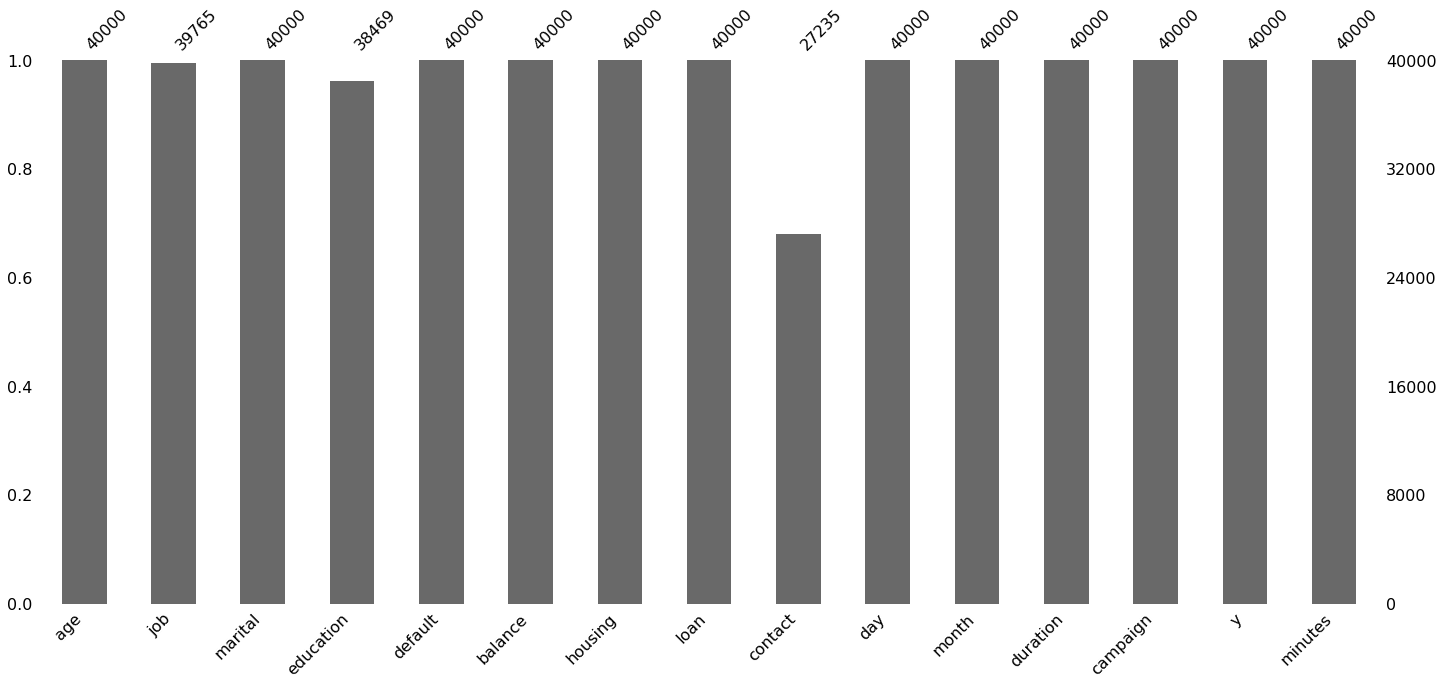

In [15]:
msno.bar(df);

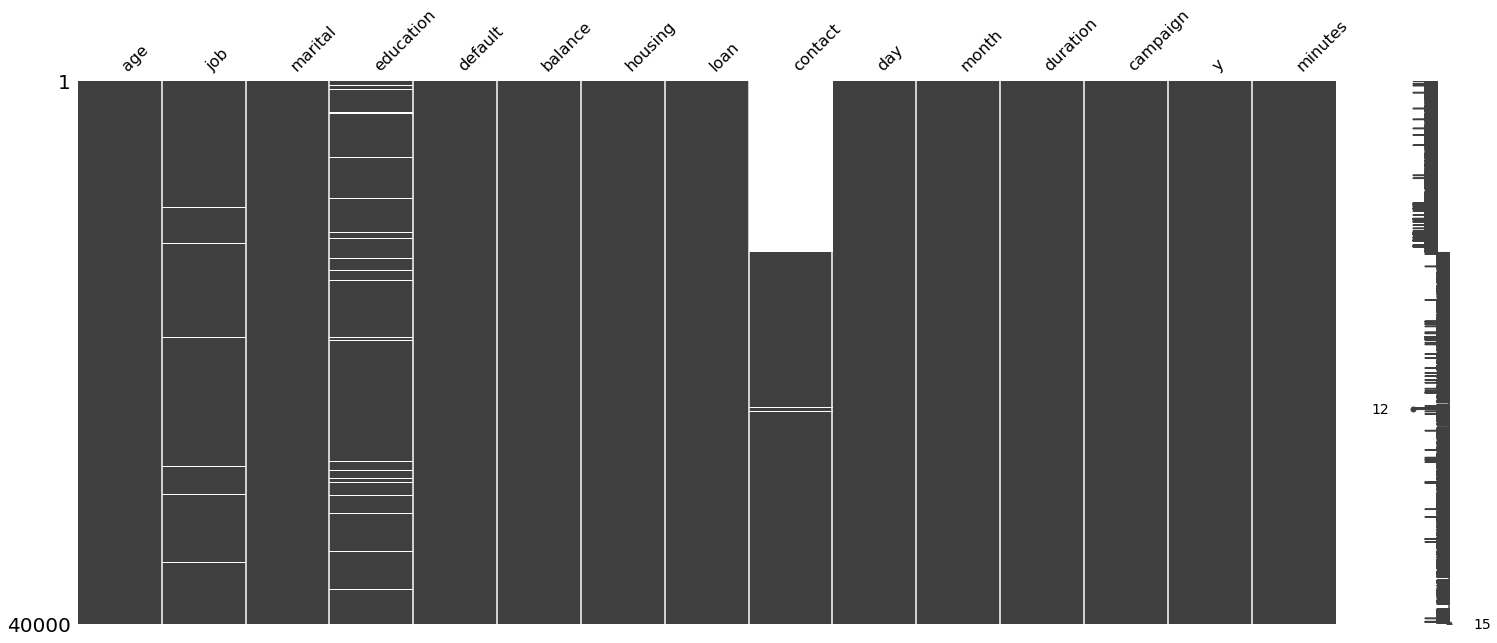

In [16]:
msno.matrix(df);

In [17]:
print("job:", len(df[df["job"].isnull()]))
print("*"*50)
print(df[df["job"].isnull()]["education"].value_counts(dropna=False))

job: 235
**************************************************
NaN          104
secondary     60
primary       45
tertiary      26
Name: education, dtype: int64


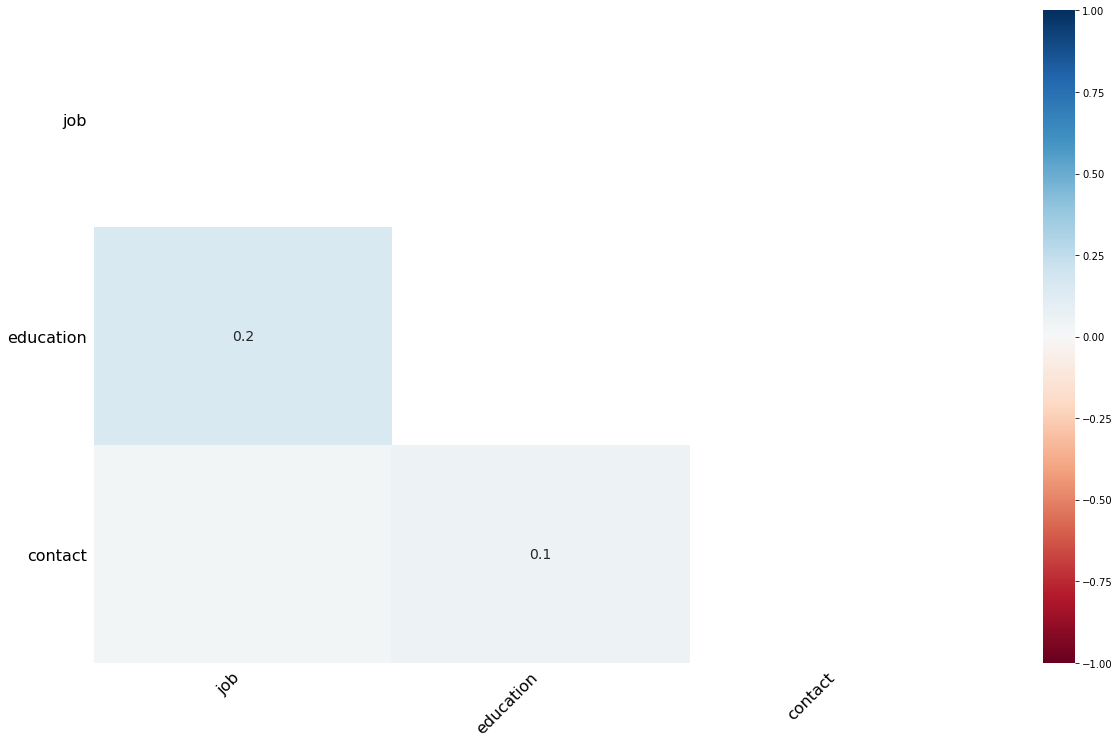

In [18]:
msno.heatmap(df);

#### "job" değişkeninde eksik değer bulunduğunda, "education" değişkeninde de eksik değer var gibi gözüküyor. "job" değişkenindeki 235 kayıp değerin 104'ünde "education" bilgisi de bulunmuyor. Çok ciddi olmasa da bir pattern var diyebiliriz. "contact" değişkenindeki kayıp değerlerin, diğer iki değişkendeki kayıp değerlerle bir ilgisi olmadığını grafikte net bir şekilde görebiliriz. Bu değişken için diğer değişkenlerle bir pattern durumu bulunmuyor.

### "age" ile "contact" tipi arasında nasıl bir durum olduğuna bir göz atalım.

In [19]:
check_ms = (pd.DataFrame(df.groupby(["contact", "age"])["age"].agg("count"))
            .rename(columns={"age": "num"})
            .reset_index(drop=False))
skipp=[num for num in range(check_ms["age"].min(),check_ms["age"].max() + 1, 1) if num not in check_ms["age"].unique()]
skipp

[84, 87, 88, 89, 91, 92, 93]

<ipython-input-20-198a185957e8>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


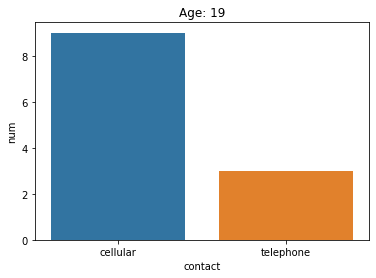

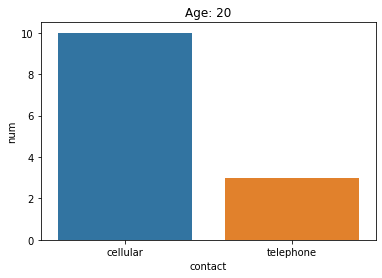

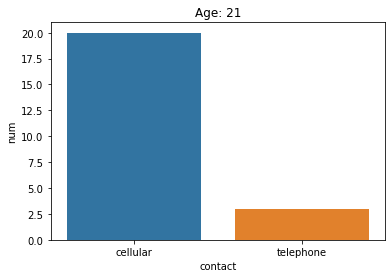

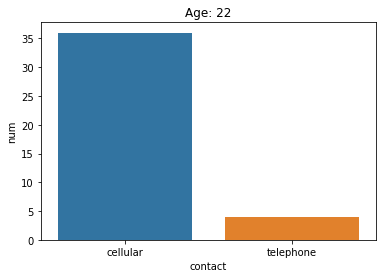

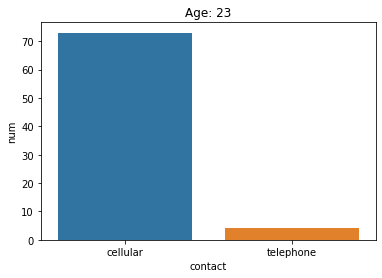

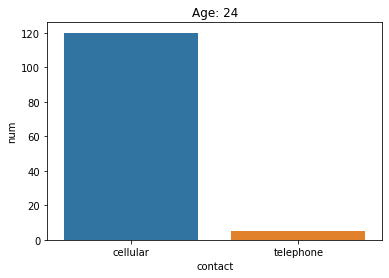

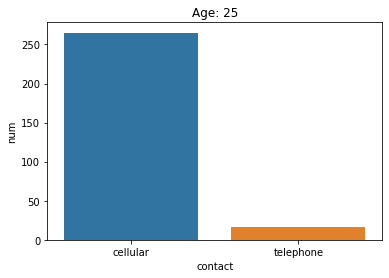

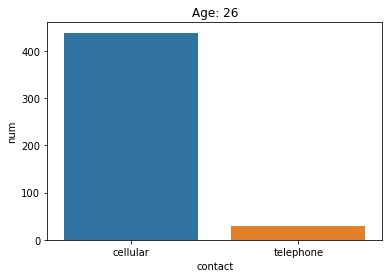

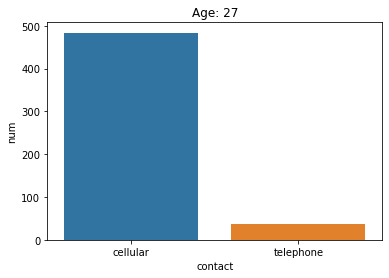

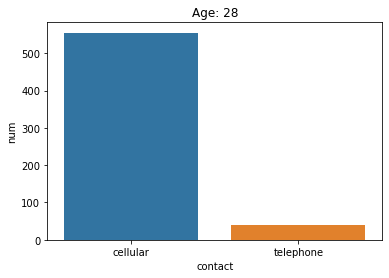

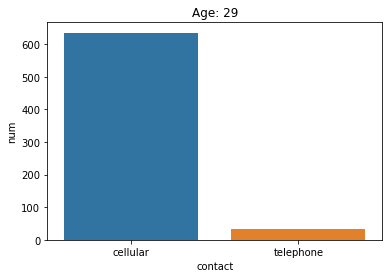

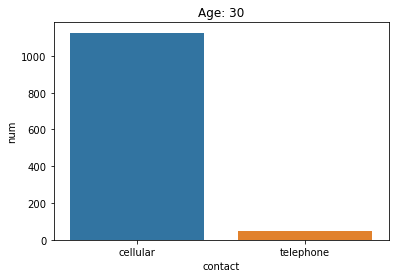

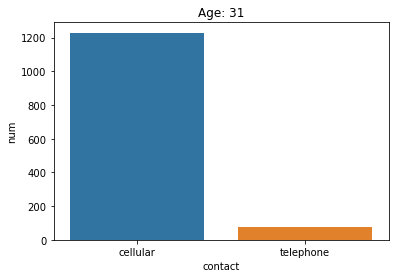

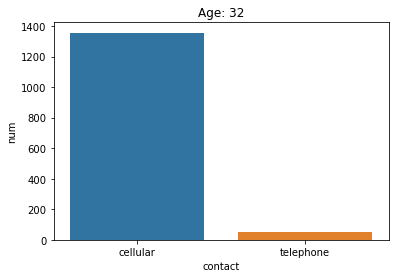

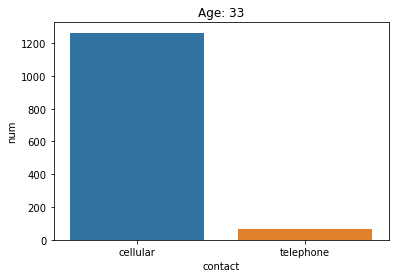

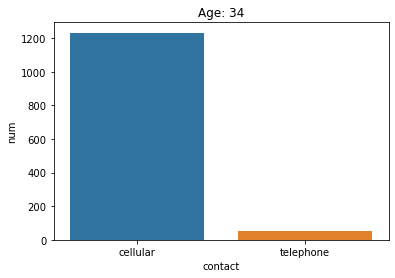

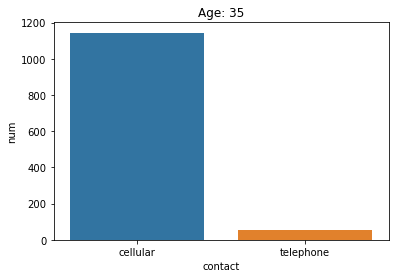

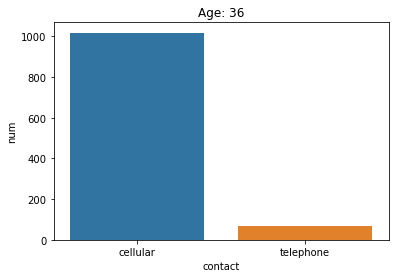

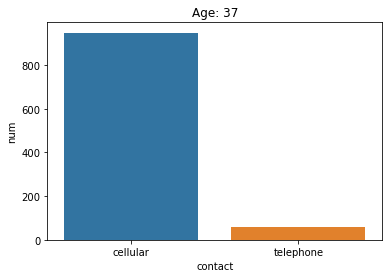

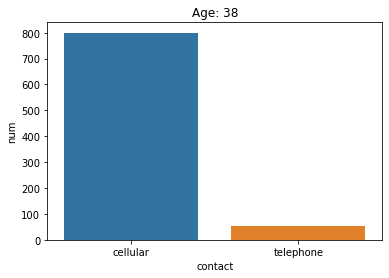

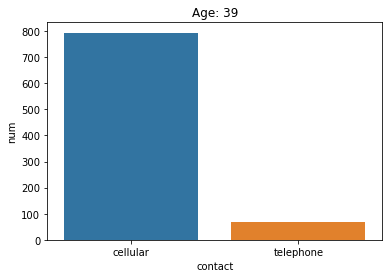

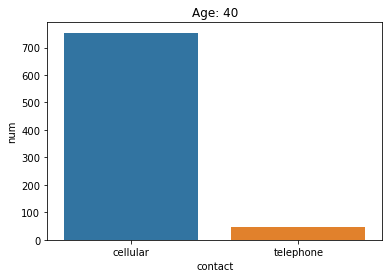

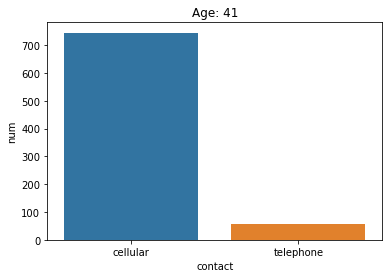

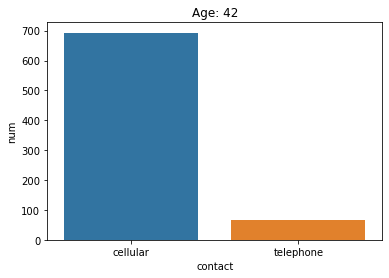

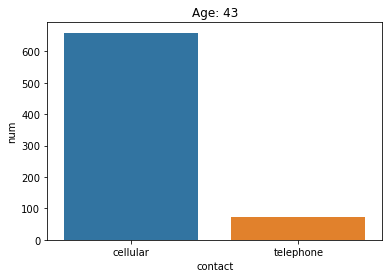

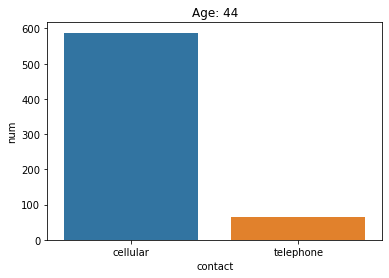

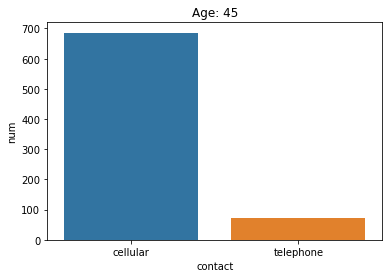

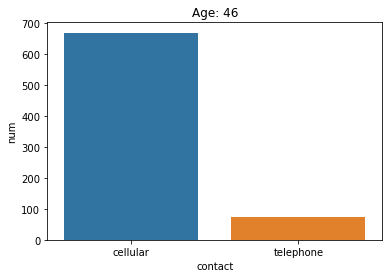

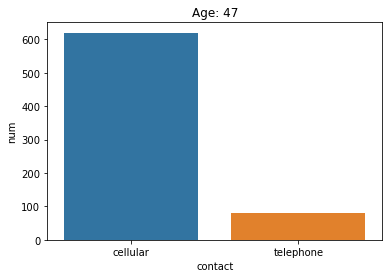

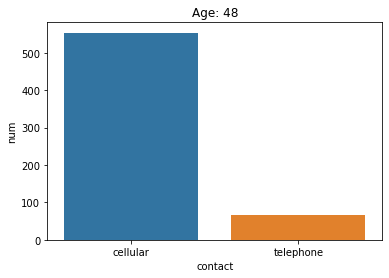

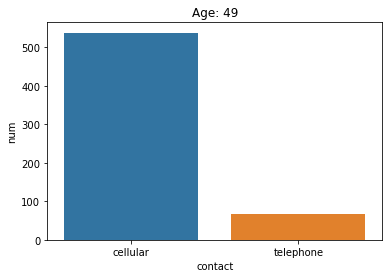

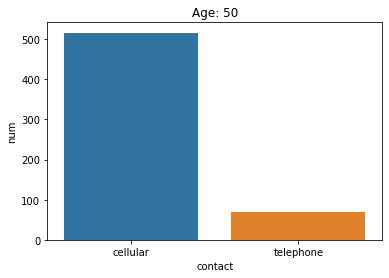

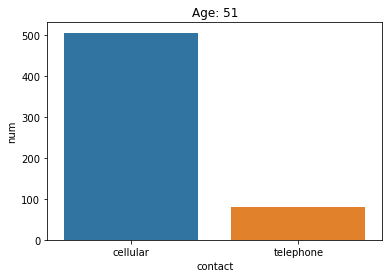

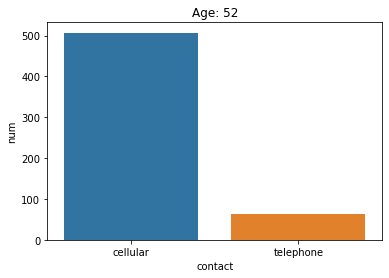

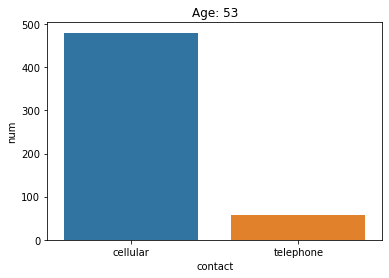

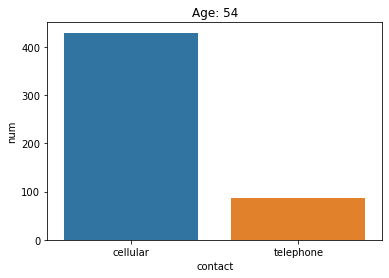

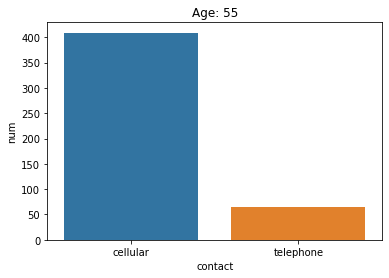

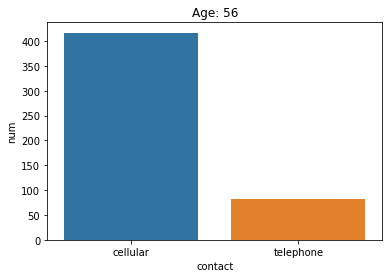

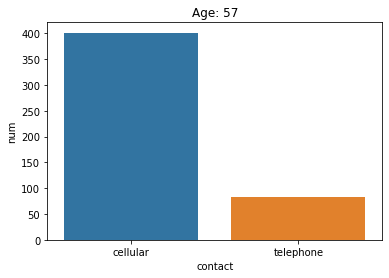

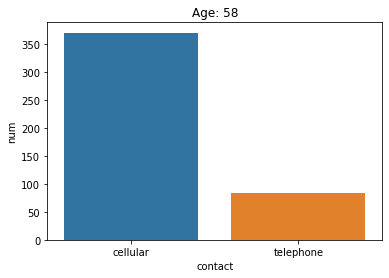

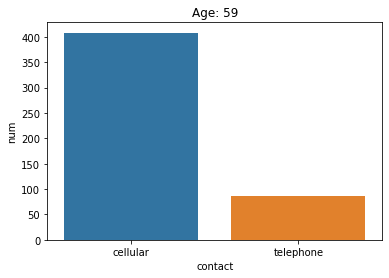

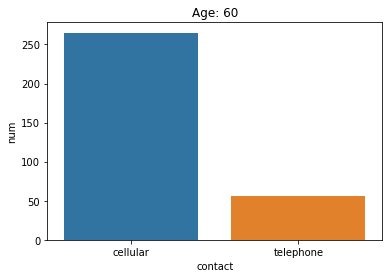

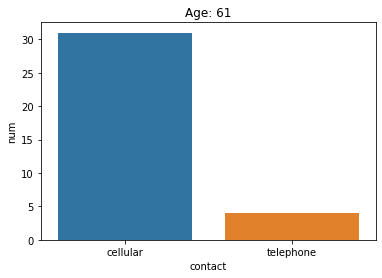

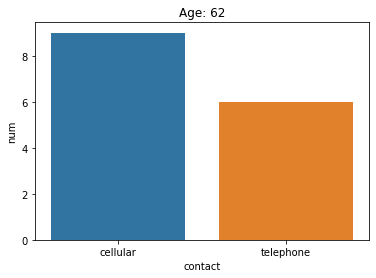

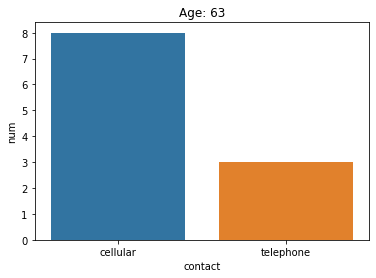

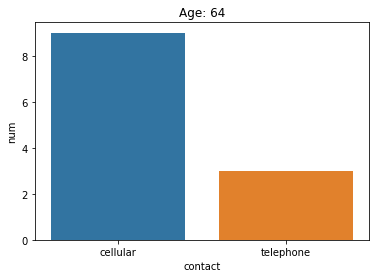

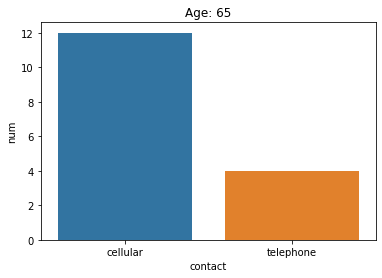

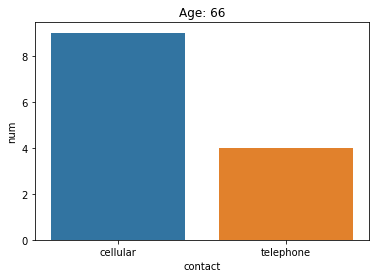

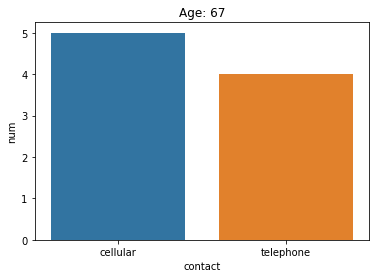

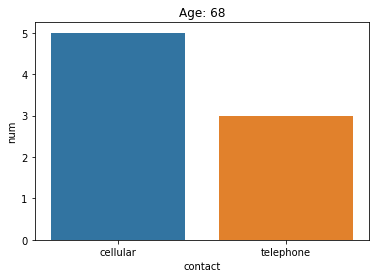

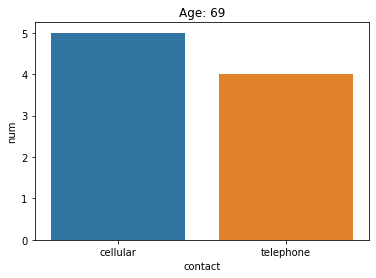

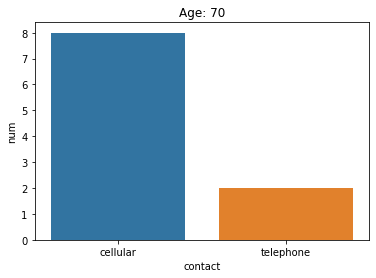

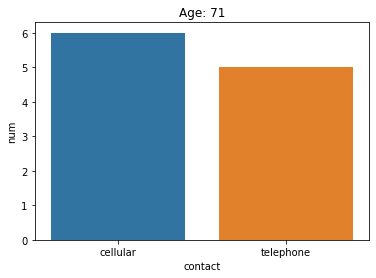

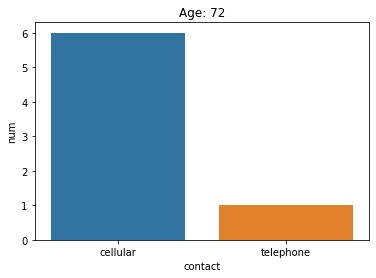

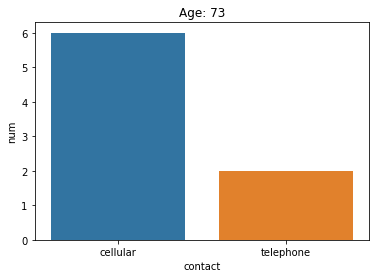

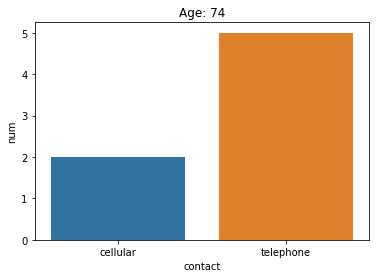

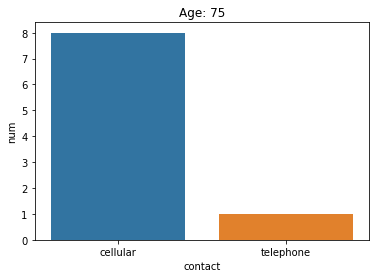

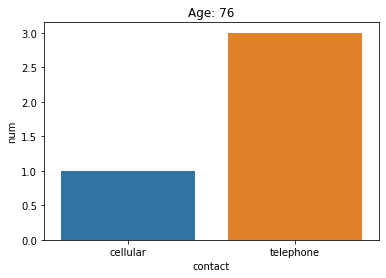

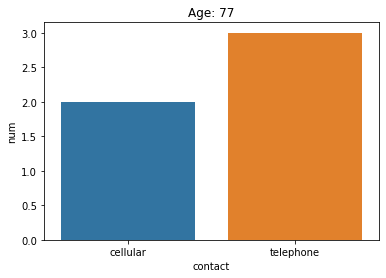

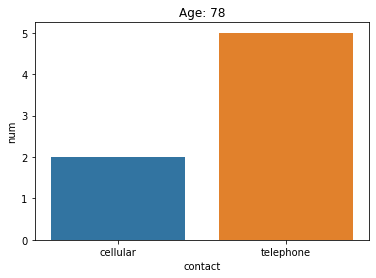

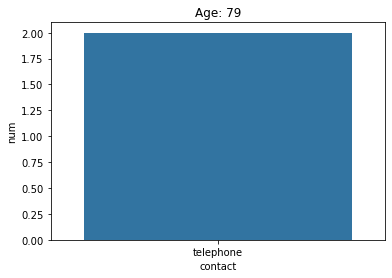

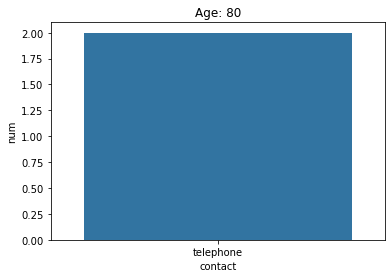

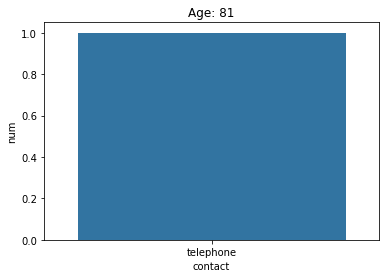

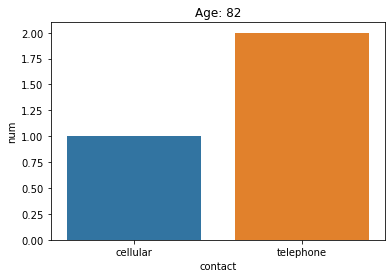

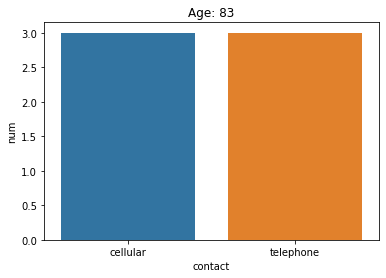

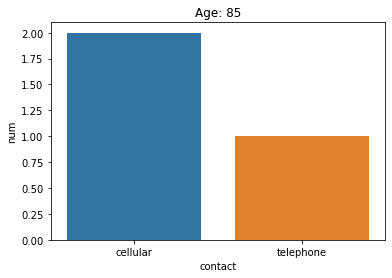

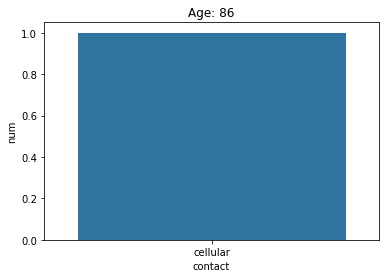

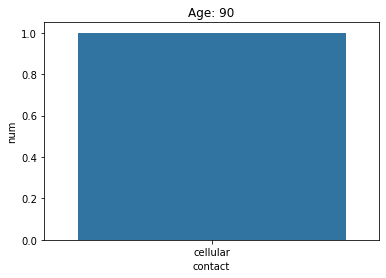

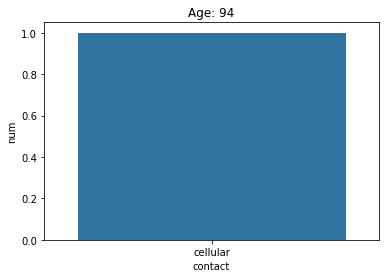

In [20]:
start = check_ms["age"].min()
finish = check_ms["age"].max()
while start < finish:
    if start in skipp:
        start +=1
        pass
    else:
        temp_df = check_ms[check_ms["age"] == start]
        plt.figure()
        sns.barplot(x="contact", y="num", data=temp_df).set_title("Age: " + str(start));
        start += 1
        continue

### 25 - 40 yaş arasındaki kişilerin hemen hemen % 90'ıyla cep telefonu üzerinden iletişime geçilmiş.

In [67]:
df["minutes_grouped"] = df["minutes"].map(lambda minutes: "5'ten az" if minutes < 5 else ((((((("5-10 arası" if minutes < 10 else "10-15 arası"
                                                                                           if minutes < 15 else "15-20 arası")
                                                                                           if minutes < 20 else "20-25 arası")
                                                                                           if minutes < 25 else "25-30 arası")
                                                                                           if minutes < 30 else "30-35 arası")
                                                                                           if minutes < 35 else "35-40 arası")
                                                                                           if minutes < 40 else "40'tan fazla")))

In [79]:
print("Checking Process...", "#"*25, sep="\n")
[print(group + ":", df[df["minutes_grouped"] == group]["minutes"].min(), "-",
      df[df["minutes_grouped"] == group]["minutes"].max()) for group in df["minutes_grouped"].unique()]

Checking Process...
#########################
5'ten az: 0.0 - 4.98
5-10 arası: 5.0 - 9.98
25-30 arası: 25.0 - 29.87
20-25 arası: 20.0 - 24.98
10-15 arası: 10.0 - 14.98
15-20 arası: 15.0 - 19.98
30-35 arası: 30.08 - 34.88
35-40 arası: 35.48 - 39.53
40'tan fazla: 40.33 - 81.97


[None, None, None, None, None, None, None, None, None]

In [72]:
check_ms_minutes = (pd.DataFrame(df.groupby(["contact", "minutes_grouped"])["minutes_grouped"].agg("count"))
            .rename(columns={"minutes_grouped": "num"})
            .reset_index(drop=False))

In [73]:
check_ms_minutes

,contact,minutes_grouped,num
0,cellular,10-15 arası,1380
1,cellular,15-20 arası,509
2,cellular,20-25 arası,197
3,cellular,25-30 arası,64
4,cellular,30-35 arası,37
5,cellular,35-40 arası,9
6,cellular,40'tan fazla,11
7,cellular,5'ten az,18140
8,cellular,5-10 arası,4567
9,telephone,10-15 arası,74


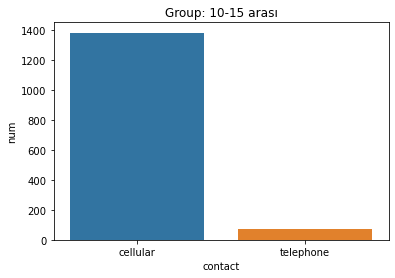

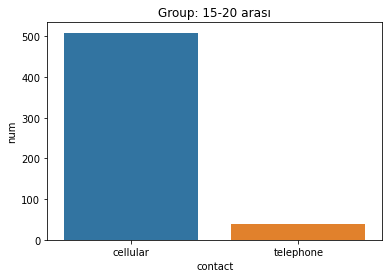

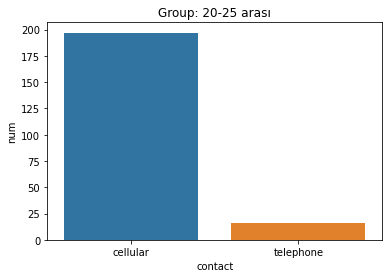

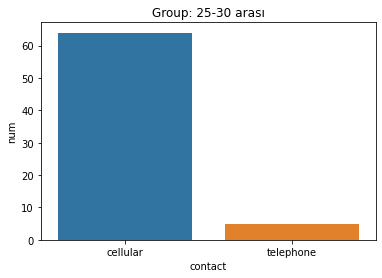

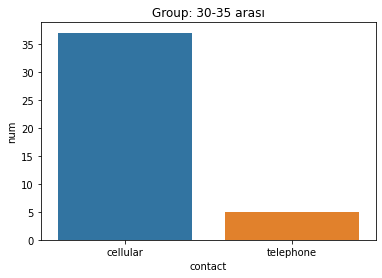

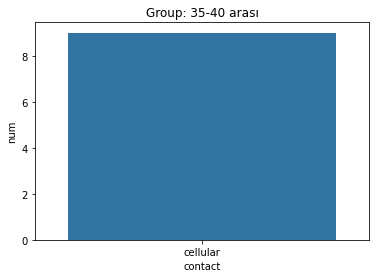

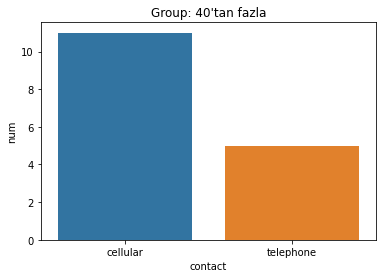

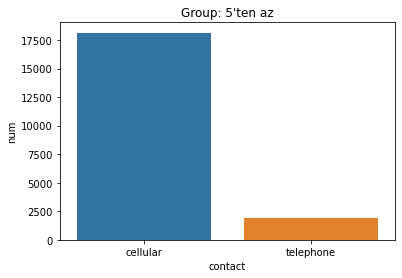

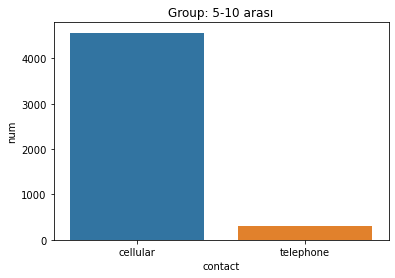

In [82]:
for group in check_ms_minutes["minutes_grouped"].unique():
    temp_df = check_ms_minutes[check_ms_minutes["minutes_grouped"] == group]
    plt.figure()
    sns.barplot(x="contact", y="num", data=temp_df).set_title("Group: " + str(group));

## <font color=darkred>2. Veri görselleştirme ve Keşifsel Veri Analizi</font>